In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

%matplotlib inline

### Cargamos el modelo

In [27]:
modelo = pd.read_csv('csv_files\modelo_final.csv')

In [29]:
modelo.sample(5)

,idaviso,idpostulante,cant_vistas,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,nombre_empresa,sepostulo
192041,1112473961,GNZ0RAK,1.0,1.0,1,2.0,0.0,Vendedores /as,"<p><span style="""">Importante Concesionario PEU...",10,3,3,Ventas,Robayna Peugeot,0
869947,1112340866,LNwMa4w,1.0,2.0,1,2.0,0.0,Vendedor de local de indumentaria infantil (Pa...,<p>Nos encontramos en la búsqueda de vendedore...,10,3,3,Ventas,Mimo & Co.,1
857356,1112298100,ZD8kWKR,1.0,1.0,1,4.0,1.0,Ejecutivo de Cuentas en Puerto Madero,"<p><span lang=""ES"">Esta es tu oportunidad para...",10,3,3,Comercial,Atento,1
429663,1112451167,VNxE6jR,1.0,2.0,2,2.0,0.0,SJ - Operario especializado metalúrgico,<p> </p>Importante empresa metalúrgica ubicada...,10,3,3,Producción,Grupo Gestión,0
207625,1112402603,RzMj8Yq,1.0,3.0,1,4.0,0.0,Auditor Interno empresa comercial La Plata,<p>Para prestigiosa empresa comercial con sede...,10,3,3,Auditoría,Mook´s Recursos Humanos,0


In [31]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
idaviso            1000000 non-null int64
idpostulante       1000000 non-null object
cant_vistas        1000000 non-null float64
rango_edad         1000000 non-null float64
sexo               1000000 non-null int64
nivel_estudios     1000000 non-null float64
esta_estudiando    1000000 non-null float64
titulo             1000000 non-null object
descripcion        1000000 non-null object
tipo_de_trabajo    1000000 non-null int64
nivel_laboral      1000000 non-null int64
nombre_zona        1000000 non-null int64
nombre_area        1000000 non-null object
nombre_empresa     999939 non-null object
sepostulo          1000000 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 114.4+ MB


Nos guardamos en un dataframe alternativo todos los registros con postulaciones efectivas del postulante al aviso en cuestión. Esto será utilizado en los features que aquí abajo construiremos.

In [33]:
si = modelo['sepostulo'] == 1
modelo_si = modelo[si]

modelo_si['sepostulo'].value_counts()

1    500000
Name: sepostulo, dtype: int64

### Nivel de estudios vs Nivel laboral

Nivel de estudios:
- 1 = Otro
- 2 = Secundario
- 3 = Terciario/Técnico
- 4 = Universitario
- 5 = Posgrado
- 6 = Master
- 7 = Doctorado

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

In [35]:
modelo_si['nivel_estudios'].value_counts()

4.0    254314
2.0    147727
3.0     69892
5.0     15792
6.0      9241
1.0      2365
7.0       669
Name: nivel_estudios, dtype: int64

In [37]:
modelo_si['nivel_laboral'].value_counts()

3    326239
2    113282
1     41199
4     15599
5      3681
Name: nivel_laboral, dtype: int64

Creamos un dataframe con porcentajes por columnas. De esta forma, el heatmap nos mostrará mejor la incidencia de cada nivel de estudios para cada nivel laboral.

In [39]:
estudios_vs_laboral_t = pd.crosstab(modelo_si['nivel_laboral'], modelo_si['nivel_estudios'], normalize='columns')
estudios_vs_laboral_t

nivel_estudios,1.0,2.0,3.0,4.0,5.0,6.0,7.0
nivel_laboral,,,,,,,
1,0.115433,0.108782,0.088394,0.068738,0.050469,0.038849,0.061286
2,0.183510,0.206178,0.221256,0.246337,0.172302,0.156801,0.162930
3,0.682452,0.665132,0.662107,0.640948,0.663817,0.667027,0.660688
4,0.016490,0.017539,0.023908,0.035629,0.083333,0.093496,0.085202
5,0.002114,0.002369,0.004335,0.008348,0.030079,0.043826,0.029895


Text(105,0.5,'Nivel laboral')

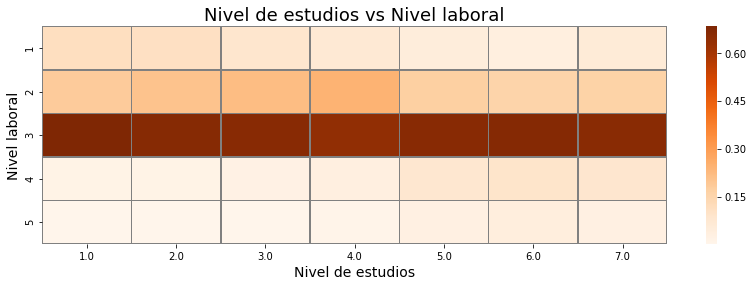

In [41]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral_t, cmap='Oranges', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [43]:
n_estudios = 7
for index, row in estudios_vs_laboral_t.iterrows():
    for i in range(1,n_estudios+1):
        peso = row[i]
        nivel_estudios = i
        nivel_laboral = index
        relacion = (modelo['nivel_estudios'] == nivel_estudios) & (modelo['nivel_laboral'] == nivel_laboral)
        modelo.loc[(relacion), 'estudios_vs_laboral'] = peso

In [45]:
modelo.sample(5)

,idaviso,idpostulante,cant_vistas,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,nombre_empresa,sepostulo,edad_vs_zona,estudios_vs_laboral
811884,1111753928,LNPMQDP,1.0,3.0,2,2.0,0.0,CAJEROS (Caba) - Eventual,<p><strong>Bayton seleccionará</strong></p><p>...,10,2,3,Tesorería,BAYTON,1,0.267721,0.206178
942086,1112461720,Y81WvD,1.0,3.0,1,4.0,0.0,EJECUTIVOS FUERZA DE VENTAS PYME PARA IMPORTAN...,<p>Para importante Banco seleccionaremos Ejecu...,10,3,3,Comercial,RANDSTAD,1,0.267721,0.640948
253314,1112196813,A3DKpkL,1.0,1.0,1,4.0,1.0,CAJERO/A - CABA,<p>Orientamos nuestra búsqueda a estudiantes ...,10,2,3,Tesorería,BBVA Francés,0,0.341469,0.246337
413816,1112450714,ow2RoAL,1.0,1.0,1,2.0,0.0,ENCARGADA DE TIENDA PARA GALERÍAS PACIFICO,"<p><span style="""">Empresa textil de Moda selec...",10,4,2,Ventas,CHED,0,0.354065,0.017539
729828,1112280005,xkPJNA6,1.0,2.0,1,4.0,0.0,Telemarketer con Experiencia en Ventas en Call...,"<p>Esta es tu oportunidad, para que puedas inc...",9,1,3,Call Center,APPLICA - Humanos con Recursos,1,0.296451,0.068738


### Esta estudiando vs Tipo de trabajo

Esta estudiando:
- 0 = Está graduado o abandonó
- 1 = Tiene un título en curso

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [47]:
modelo_si['esta_estudiando'].value_counts()

0.0    317385
1.0    182615
Name: esta_estudiando, dtype: int64

In [49]:
modelo_si['tipo_de_trabajo'].value_counts()

10    423357
9      68897
6       2491
7       1715
5       1348
3        743
4        727
8        522
2        181
1         19
Name: tipo_de_trabajo, dtype: int64

In [51]:
estudiando_vs_tipo_trabajo_t = pd.crosstab(modelo_si['esta_estudiando'], modelo_si['tipo_de_trabajo'], normalize='columns')
estudiando_vs_tipo_trabajo_t

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
esta_estudiando,,,,,,,,,,
0.0,0.894737,0.491713,0.667564,0.620358,0.678783,0.280209,0.707872,0.609195,0.531997,0.653193
1.0,0.105263,0.508287,0.332436,0.379642,0.321217,0.719791,0.292128,0.390805,0.468003,0.346807


Text(105,0.5,'Esta estudiando')

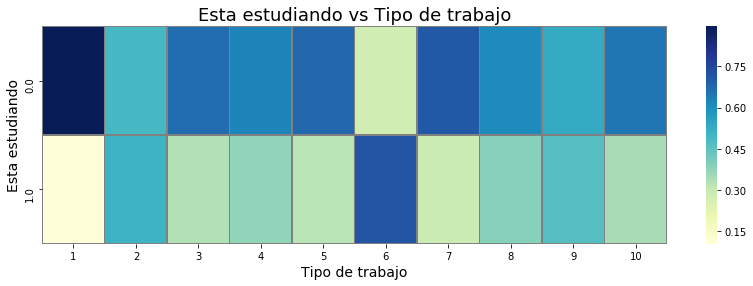

In [53]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudiando_vs_tipo_trabajo_t, cmap='YlGnBu', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Esta estudiando', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [55]:
n_trabajos = 10
for index, row in estudiando_vs_tipo_trabajo_t.iterrows():
    for i in range(1,n_trabajos+1):
        peso = row[i]
        tipo_trabajo = i
        esta_estudiando = index
        relacion = (modelo['tipo_de_trabajo'] == tipo_trabajo) & (modelo['esta_estudiando'] == esta_estudiando)
        modelo.loc[(relacion), 'estudia_vs_tipo_trabajo'] = peso

In [57]:
modelo.sample(5)

,idaviso,idpostulante,cant_vistas,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,nombre_empresa,sepostulo,edad_vs_zona,estudios_vs_laboral,estudia_vs_tipo_trabajo
133149,1112482074,akbb2bq,1.0,2.0,1,4.0,1.0,Recepcionista - Para consultorio odontológico,<p>¿Tenés experiencia laboral como recepcionis...,10,1,3,Recepcionista,MAFA,0,0.296451,0.068738,0.346807
992661,1112263465,pzM6LNm,1.0,3.0,2,5.0,1.0,Representante de Ventas Telefónicas,"<p><span style="""">Teleperformance, empresa mul...",9,3,3,Ventas,Grupo Teleperformance,1,0.267721,0.663817,0.468003
462456,1112363005,5mqD3Eq,1.0,3.0,2,2.0,0.0,Entrevista CAJERO REPOSITOR presentarse MARTES...,<p><strong>Suministra</strong> seleccionará <s...,10,2,3,Comercial,Suministra,0,0.267721,0.206178,0.653193
674733,1112370708,RzMeGXO,1.0,2.0,2,3.0,1.0,Técnico/Ingeniero electromecánico Viajante - z...,<p><strong>Adecco Office</strong> está especia...,10,3,3,Ingeniería Mecánica,Adecco - Región NORTE & OESTE GBA,1,0.296451,0.662107,0.346807
742369,1112206678,xk9jO4x,1.0,1.0,1,4.0,1.0,Programa Jóvenes Emprendedores 2018,<p>Formá parte de la empresa de alimentos núme...,10,3,3,Producción,Grupo Arcor,1,0.341469,0.640948,0.346807


### Rango de edad vs Tipo de trabajo

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [58]:
modelo_si['rango_edad'].value_counts()

1.0    171142
2.0    148239
3.0    133517
4.0     47102
Name: rango_edad, dtype: int64

In [59]:
modelo_si['tipo_de_trabajo'].value_counts()

10    423357
9      68897
6       2491
7       1715
5       1348
3        743
4        727
8        522
2        181
1         19
Name: tipo_de_trabajo, dtype: int64

In [60]:
edad_vs_tipo_trabajo_t = pd.crosstab(modelo_si['rango_edad'], modelo_si['tipo_de_trabajo'], normalize='columns')
edad_vs_tipo_trabajo_t

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
rango_edad,,,,,,,,,,
1.0,0.473684,0.756906,0.430686,0.259972,0.308605,0.640305,0.354519,0.392720,0.504347,0.313955
2.0,0.210526,0.121547,0.296097,0.320495,0.315282,0.230831,0.293294,0.247126,0.256600,0.303406
3.0,0.263158,0.110497,0.232840,0.305365,0.278190,0.111200,0.282216,0.273946,0.184986,0.281259
4.0,0.052632,0.011050,0.040377,0.114168,0.097923,0.017664,0.069971,0.086207,0.054066,0.101380


Text(105,0.5,'Rango edad')

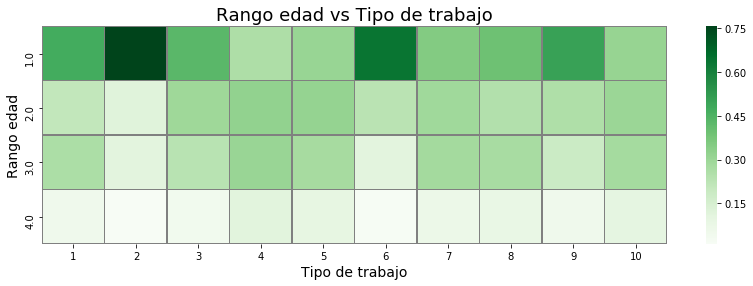

In [61]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_tipo_trabajo_t, cmap='Greens', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [62]:
n_trabajos = 10
for index, row in edad_vs_tipo_trabajo_t.iterrows():
    for i in range(1,n_trabajos+1):
        peso = row[i]
        tipo_trabajo = i
        rango_edad = index
        relacion = (modelo['tipo_de_trabajo'] == tipo_trabajo) & (modelo['rango_edad'] == rango_edad)
        modelo.loc[(relacion), 'edad_vs_tipo_trabajo'] = peso

In [63]:
modelo.sample(5)

,idaviso,idpostulante,cant_vistas,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,nombre_empresa,sepostulo,edad_vs_zona,estudios_vs_laboral,estudia_vs_tipo_trabajo,edad_vs_tipo_trabajo
671990,1112242436,xkv6vJx,1.0,1.0,1,2.0,0.0,Auxiliar administrativo,<p><strong>Adecco Industrial </strong>está esp...,9,2,3,Administración,Adecco -Región Litoral,1,0.341469,0.206178,0.531997,0.504347
365922,1112445506,3NkerAP,1.0,2.0,1,2.0,0.0,Operarios textiles y Tec. de mantenimiento p/ ...,<p>Importante Empresa Textil se encuentra en l...,10,2,3,Producción,Suministra,0,0.296451,0.206178,0.653193,0.303406
756019,1112334791,LNMav5w,1.0,2.0,2,4.0,0.0,Cajero/a - Part Time,<p>Te estamos buscando para formar parte de un...,10,3,3,Comercial,Farmacity,1,0.296451,0.640948,0.653193,0.303406
321766,1112475260,bO42Gb4,1.0,2.0,1,4.0,0.0,Teleoperador para venta de Seguros - CABA,"<p>Para importante entidad aseguradora, nos en...",9,3,3,Telemarketing,Manpower,0,0.296451,0.640948,0.531997,0.256600
26284,1112437023,DrXW4YL,1.0,1.0,2,4.0,1.0,Vendedor,"Vendedor , salon y domiciliario de cortinas Ro...",10,3,3,Ventas,Cortinas factory,0,0.341469,0.640948,0.346807,0.313955


### Rango de edad vs Nombre zona

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nombre zona:
- 1 = Otros
- 2 = Capital Federal
- 3 = Gran Buenos Aires

In [64]:
modelo['rango_edad'].value_counts()

1.0    344163
2.0    286789
3.0    267280
4.0    101768
Name: rango_edad, dtype: int64

In [65]:
modelo['nombre_zona'].value_counts()

3    926610
2     73164
1       226
Name: nombre_zona, dtype: int64

In [66]:
edad_vs_zona_t = pd.crosstab(modelo_si['rango_edad'], modelo_si['nombre_zona'], normalize='columns')
edad_vs_zona_t

nombre_zona,1,2,3
rango_edad,,,
1.0,0.116667,0.354065,0.341469
2.0,0.308333,0.296799,0.296451
3.0,0.416667,0.257249,0.267721
4.0,0.158333,0.091887,0.094359


Text(105,0.5,'Rango edad')

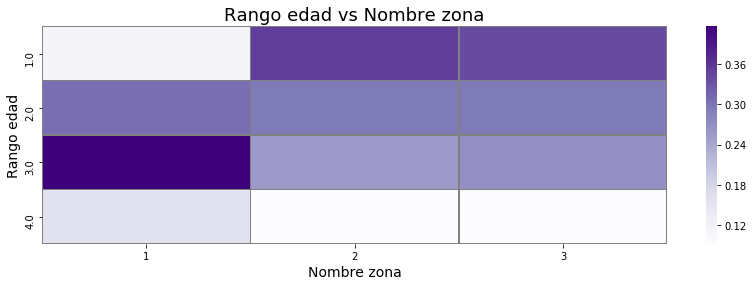

In [67]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_zona_t, cmap='Purples', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Nombre zona', fontsize=18)
heatmap.set_xlabel('Nombre zona', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [68]:
n_zonas = 3
for index, row in edad_vs_zona_t.iterrows():
    for i in range(1,n_zonas+1):
        peso = row[i]
        nombre_zona = i
        rango_edad = index
        relacion = (modelo['nombre_zona'] == nombre_zona) & (modelo['rango_edad'] == rango_edad)
        modelo.loc[(relacion), 'edad_vs_zona'] = peso

In [69]:
modelo.sample(5)

,idaviso,idpostulante,cant_vistas,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,nombre_empresa,sepostulo,edad_vs_zona,estudios_vs_laboral,estudia_vs_tipo_trabajo,edad_vs_tipo_trabajo
99440,1112428125,0zPvaOM,1.0,1.0,1,2.0,0.0,Cajeros - Repositores para importante retail Z...,"<p style=""""><span style="""">Nos encontramos en ...",10,3,3,Ventas,Assistem,0,0.341469,0.665132,0.653193,0.313955
738790,1112172032,NQA2ax,1.0,2.0,1,4.0,1.0,Analista contable - Eventual por licencia,<p><strong>Adecco Office</strong> está especia...,10,2,3,Contabilidad,Adecco -Región Office,1,0.296451,0.246337,0.346807,0.303406
550111,1112393185,EzpObY9,1.0,2.0,2,4.0,1.0,ADMINISTRATIVO DE FACTURACIÓN,?Estamos buscando UN/A ADMINISTRATIVO DE FACTU...,10,2,3,Comercial,VIDITEC S.A.,1,0.296451,0.246337,0.346807,0.303406
556398,1112443991,4rPKEWP,1.0,1.0,1,4.0,1.0,Operadores Call Center para captar fondos para...,"<p style="""">Buscamos candidatos extrovertidos,...",9,1,2,Telemarketing,Qendar,1,0.354065,0.068738,0.468003,0.504347
420525,1112445506,Yj5M6RJ,1.0,3.0,2,2.0,0.0,Operarios textiles y Tec. de mantenimiento p/ ...,<p>Importante Empresa Textil se encuentra en l...,10,2,3,Producción,Suministra,0,0.267721,0.206178,0.653193,0.281259


In [70]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
idaviso                    1000000 non-null int64
idpostulante               1000000 non-null object
cant_vistas                1000000 non-null float64
rango_edad                 1000000 non-null float64
sexo                       1000000 non-null int64
nivel_estudios             1000000 non-null float64
esta_estudiando            1000000 non-null float64
titulo                     1000000 non-null object
descripcion                1000000 non-null object
tipo_de_trabajo            1000000 non-null int64
nivel_laboral              1000000 non-null int64
nombre_zona                1000000 non-null int64
nombre_area                1000000 non-null object
nombre_empresa             999939 non-null object
sepostulo                  1000000 non-null int64
edad_vs_zona               1000000 non-null float64
estudios_vs_laboral        1000000 non-null float64
estudia_vs_tipo_trabaj

### Relación entre las distintas áreas

La idea es encontrar relaciones fuertes entre las distintas áreas de los avisos laborales. Para esto, comenzamos por analizar las áreas a las que se postuló cada postulante.

Cabe destacar que únicamente nos interesa si el postulante se postuló o no a una cierta área: no influye la cantidad de veces que lo hizo.

In [71]:
# Eliminamos las postulaciones duplicadas de un mismo postulante a una misma área
modelo_areas = modelo_si.drop_duplicates(['idpostulante','nombre_area'])

# Creamos un diccionario del estilo {idpostulante:[areas_a_las_que_se_postulo]}
dic_id_area = {}
for index, row in modelo_si.iterrows():
    area = row['nombre_area']
    idpostulante = row['idpostulante']
    if (idpostulante not in dic_id_area):
        dic_id_area[idpostulante] = [area]
    else:
        if (area not in dic_id_area[idpostulante]):
            dic_id_area[idpostulante].append(area)

Creamos una lista de listas. Cada sublista contiene las areas a las que se postuló cada postulante. Ya no nos interesa el idpostulante, sino las areas en común.

NOTA: tomamos listas de mas de un elemento y menos de 8, ya que luego calcularemos todas las duplas
posibles para cada lista. Considerar que 7C2 = 21 duplas como máximo por lista.

In [72]:
lista_areas = []
for id in dic_id_area:
    areas = dic_id_area[id]
    if (len(areas) > 1 and len(areas) < 8):
        lista_areas.append(areas)

In [73]:
df_areas = pd.DataFrame({'areas':lista_areas})
df_areas.head(5)

,areas
0,"[Administración, Recepcionista, Comercial]"
1,"[Abastecimiento, Producción]"
2,"[Hotelería, Mantenimiento y Limpieza]"
3,"[Ventas, Producción, Atención al Cliente]"
4,"[Marketing, Comunicacion, Administración]"


In [74]:
df_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75050 entries, 0 to 75049
Data columns (total 1 columns):
areas    75050 non-null object
dtypes: object(1)
memory usage: 586.4+ KB


A continuación, calcularemos todas las duplas posibles para cada lista de áreas y las ordenaremos de mayor a menor por cantidad de apariciones. De esta forma, podremos saber cuáles son las combinaciones de áreas más comunes.

In [75]:
dic_tuplas = {}
contador = 0
for index, row in df_areas.iterrows():
    areas = sorted(row['areas'])
    for area_x in areas:
        indice = areas.index(area_x)
        for area_y in areas[indice+1:]:
            tupla = (area_x, area_y)
            if (tupla not in dic_tuplas):
                dic_tuplas[tupla] = 1
            else:
                dic_tuplas[tupla] += 1

In [76]:
df_tuplas = pd.DataFrame(list(dic_tuplas.items()), columns=['dupla_areas','cantidad'])
df_tuplas = df_tuplas.sort_values(by=['cantidad'], ascending=False).reset_index()
df_tuplas = df_tuplas[['dupla_areas', 'cantidad']]

df_tuplas.head(10)

,dupla_areas,cantidad
0,"(Comercial, Ventas)",7995
1,"(Atención al Cliente, Ventas)",7145
2,"(Administración, Ventas)",5279
3,"(Call Center, Ventas)",4812
4,"(Atención al Cliente, Call Center)",4057
5,"(Atención al Cliente, Comercial)",3965
6,"(Recepcionista, Ventas)",3948
7,"(Administración, Comercial)",3911
8,"(Administración, Recepcionista)",3807
9,"(Administración, Atención al Cliente)",3638


In [77]:
df_tuplas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 2 columns):
dupla_areas    7304 non-null object
cantidad       7304 non-null int64
dtypes: int64(1), object(1)
memory usage: 114.2+ KB


### Exportamos el modelo final con los nuevos features

In [78]:
modelo.sample(5)

,idaviso,idpostulante,cant_vistas,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,nombre_empresa,sepostulo,edad_vs_zona,estudios_vs_laboral,estudia_vs_tipo_trabajo,edad_vs_tipo_trabajo
320680,1112440817,5mrPvOz,1.0,4.0,2,3.0,0.0,Agente de Propaganda Médica,"<p>Beiersdorf, compañía alemana líder en el cu...",10,3,3,Producto,BEIERSDORF,0,0.094359,0.662107,0.653193,0.101380
686148,1112348847,pzNZjmW,1.0,2.0,1,3.0,0.0,Administrativo/a pagos,<p>Para importante empresa ubicada en la ciuda...,10,3,3,Administración,RANDSTAD,1,0.296451,0.662107,0.653193,0.303406
7069,1111937898,1Q49mRz,1.0,2.0,1,4.0,0.0,Recepcionista Part time,<p>Nos encontramos en la busqueda de una recep...,9,3,3,Recepcionista,GI GROUP Argentina,0,0.296451,0.640948,0.531997,0.256600
90133,1112401622,3Nk86kr,1.0,1.0,1,2.0,0.0,Vendedores de Electrodomésticos y Sommiers- Ca...,"<p>Cadena de venta de productos para el hogar,...",10,3,2,Ventas,LF Consultoras,0,0.354065,0.665132,0.653193,0.313955
128988,1112398356,OqrlQav,2.0,3.0,1,4.0,0.0,Recepcionista (Part time),<p><strong>Adecco Office</strong> está especia...,9,3,3,Recepcionista,Adecco -Región Office,0,0.267721,0.640948,0.531997,0.184986


In [79]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
idaviso                    1000000 non-null int64
idpostulante               1000000 non-null object
cant_vistas                1000000 non-null float64
rango_edad                 1000000 non-null float64
sexo                       1000000 non-null int64
nivel_estudios             1000000 non-null float64
esta_estudiando            1000000 non-null float64
titulo                     1000000 non-null object
descripcion                1000000 non-null object
tipo_de_trabajo            1000000 non-null int64
nivel_laboral              1000000 non-null int64
nombre_zona                1000000 non-null int64
nombre_area                1000000 non-null object
nombre_empresa             999939 non-null object
sepostulo                  1000000 non-null int64
edad_vs_zona               1000000 non-null float64
estudios_vs_laboral        1000000 non-null float64
estudia_vs_tipo_trabaj

In [80]:
modelo.to_csv('csv_files\modelo_final_featured.csv', encoding='utf-8', index=False)

### Exportamos los dataframes con los pesos obtenidos para los nuevos features

In [88]:
estudios_vs_laboral_t.to_csv('csv_files\estudios_vs_laboral_t.csv', encoding='utf-8', index=True, header=True)

estudiando_vs_tipo_trabajo_t.to_csv('csv_files\estudiando_vs_tipo_trabajo_t.csv', encoding='utf-8', index=True, header=True)

edad_vs_tipo_trabajo_t.to_csv('csv_files\edad_vs_tipo_trabajo_t.csv', encoding='utf-8', index=True, header=True)

edad_vs_zona_t.to_csv('csv_files\edad_vs_zona_t.csv', encoding='utf-8', index=True, header=True)